In [2]:
import pandas as pd                                     #importing all necesary libraries
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  


In [29]:
data = pd.read_excel("salary.xlsx")` 
data

,year Experience,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39831
5,2.5,32651
6,1.0,12354
7,2.3,23546
8,3.2,23654
9,5.1,39875


In [30]:
data.describe()                                              #describing the data

,year Experience,salary
count,24.000000,24.000000
mean,2.508333,35582.458333
std,3.017761,9407.164088
min,1.000000,12354.000000
25%,1.275000,30031.250000
50%,1.900000,39409.500000
75%,2.225000,43297.250000
max,16.000000,46813.000000


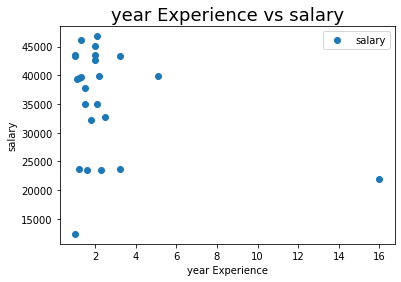

In [31]:
data.plot(x='year Experience', y='salary', style='o')  
plt.title('year Experience vs salary', fontsize= 18)      # Plotting the distribution of scores
plt.xlabel('year Experience',fontsize = 10)  
plt.ylabel('salary', fontsize = 10)  
plt.show()

#### Preparing the data for analysis

In [32]:
X = data.iloc[:, :-1].values  #selecting column no. of hours of study
y = data.iloc[:, 1].values    #selecting scores column
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.5],
       [ 1. ],
       [ 2.3],
       [ 3.2],
       [ 5.1],
       [ 2.1],
       [ 2. ],
       [ 1. ],
       [ 1.8],
       [16. ],
       [ 1. ],
       [ 1.3],
       [ 1.2],
       [ 1.5],
       [ 2.1],
       [ 2. ],
       [ 3.2],
       [ 1.2],
       [ 1.6]])

In [33]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,             #splitting the data into training and testing sets
                            test_size=0.2, random_state=0)            #using scikit-learn's built in function 

#### Training the Algorithm

In [34]:
from sklearn.linear_model import LinearRegression                     #Training the data
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed")

Training completed


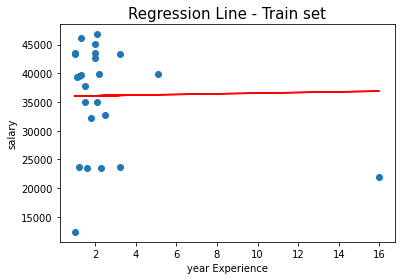

In [35]:
line = regressor.coef_*X+regressor.intercept_                          # Plotting the regression line
plt.scatter(X, y)                                                       #training dataset regression line
plt.plot(X, line, color = "red");
plt.xlabel("year Experience", fontsize = 10)
plt.ylabel("salary", fontsize = 10)
plt.title("Regression Line - Train set", fontsize = 15,)
plt.show()

#### Making the predictions

In [36]:
print(X_test)                                                      # Testing data - In Hours
y_pred = regressor.predict(X_test)                                 # Predicting the scores

[[ 2. ]
 [ 2.1]
 [ 1.2]
 [16. ]
 [ 2. ]]


In [37]:
y_pred

array([36086.58561587, 36092.32440691, 36040.67528752, 36890.01636202,
       36086.58561587])

In [38]:
#Parameters used for the model df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})          #Comparison between predicted and test data
df 
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})          #Comparison between predicted and test data
df 

,Actual,Predicted
0,45128,36086.585616
1,34986,36092.324407
2,23648,36040.675288
3,21984,36890.016362
4,42651,36086.585616


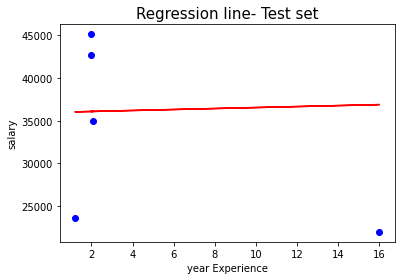

In [40]:
plt.plot(X_test, y_pred, color = "red") 
plt.scatter(X_test, y_test, color = "blue")                          #Using scatter plot for test data set
plt.xlabel("year Experience", fontsize = 10)
plt.ylabel("salary", fontsize = 10)
plt.title("Regression line- Test set", fontsize =15)
plt.show()

#### Evaluation of model 

#### Accuracy of the Model

In [46]:
from sklearn import metrics
print("R_square =", metrics.r2_score(y_test, y_pred))

R_square = -0.11349943652297156


#### Prediction of score

In [42]:
predict_score = regressor.predict([[2.0]])
print("for higher salary need year of experience 2.0 = ", predict_score)

for higher salary need year of experience 2.0 =  [36086.58561587]


In [43]:
print('Mean Square Error', metrics.mean_squared_error(y_test, y_pred))

Mean Square Error 100366077.70643015
